<strong><font size = "4" color = "black">Introdução à Ciência de Dados</font></strong><br>
<font size = "3" color = "gray">Prof. Valter Moreno</font><br>
<font size = "3" color = "gray">2022</font><br>  

<hr style="border:0.1px solid gray"> </hr>
<font size = "5" color = "black">Introdução ao Python</font><p>
<font size = "5" color = "black">Aula 9: Visualização com MatPlotLib, Seaborn e Pandas </font>
<hr style="border:0.1px solid gray"> </hr>

O pacote tipicamente usado para a criação de gráficos no Python é o `matplotlib`. Há várias outras opções, como `seaborn`, `altair`, `plotly`, and `bokeh`, cada uma com seus pontos fortes e funcionalidades específicas. Nesta aula, nos concentraremos nas principais funcionalidades implementadas no `matplotlib` e no `seaborn`, assim como nas opções de geração de gráficos no `pandas`. Para mais informações, consulte os websites oficiais dos pacotes:

 - [matplotlib.org](https://matplotlib.org/)
 - [seaborn.pydata.org](https://seaborn.pydata.org/)
 - [pandas's visualization](https://pandas.pydata.org/docs/user_guide/visualization.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para que os gráficos sejam mostrados logo abaixo das células e 
# armazenados com o notebook, usamos o comando mágico:
%matplotlib inline

Vamos carregar a base de dados Titanic da internet.

In [2]:
# Dados da base Titanic obtidos em https://gist.github.com/fyyying:
url = "https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv"

dados = pd.read_csv(url)
dados.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# MatPlotLib

O `matplotlib` inclui diversas preconfigurações de estilos de apresentação dos elementos visuais de um gráfico.

In [3]:
# Estilos disponíveis:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

O estilo pode ser alterado com a função *use* do módulo *style* do `matplotlib`. Vamos definir o estilo para "tableau-colorblind10", que é o padrão do pacote. 

In [4]:
plt.style.use("tableau-colorblind10")

## Figuras e eixos

No `matplotlib`, gráficos são desenhados em espaços ou telas denominadas *figuras*. Uma figura pode conter vários *eixos* (*axes*), que são usados para desenhar gráficos específicos, além de subfiguras.

Os elementos de um gráfico são denominados *artistas* (*Artists*). Eles incluem as figuras e eixos em si, textos, símbolos, etc.

O processo de criação de gráficos se dá da seguinte forma:

 1. definição da figura;
 2. definição de um ou mais eixos;
 3. definição do gráfico a ser desenhado num dado conjunto de eixos;
 4. plotagem de cada gráfico a partir do conjunto de dados correspondente (deve ser compatível com *arrays* do `numpy`); e
 5. exibição dos gráficos

In [5]:
fig = plt.figure(figsize = (5, 5),        # cria uma figura vazia, sem eixos
                 dpi = 300,
                 facecolor = "white",
                 edgecolor = "darkblue",
                 frameon = True,
                )

<Figure size 1500x1500 with 0 Axes>

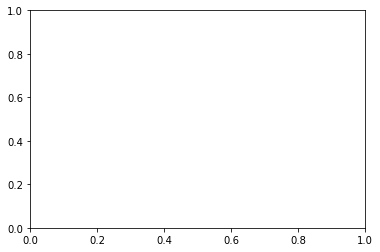

In [6]:
fig, ax = plt.subplots()  # cria uma figura com um eixo (axis)

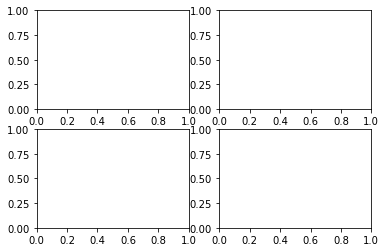

In [7]:
fig, axs = plt.subplots(2, 2)  # cria uma figura com uma grade 2 x 2, ou seja, com 4 eixos

In [8]:
type(fig)

matplotlib.figure.Figure

Os eixos (*axis*) são definidos em um `numpy` *array*, sendo referenciados como tradicionalmente se faz em um *array*.

In [9]:
type(axs)

numpy.ndarray

In [10]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [11]:
axs[0, 0]

<AxesSubplot:>

Outra opção é definir variáveis para cada eixo criado.

In [12]:
fig = plt.figure(figsize = (5, 5))

<Figure size 360x360 with 0 Axes>

In [13]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

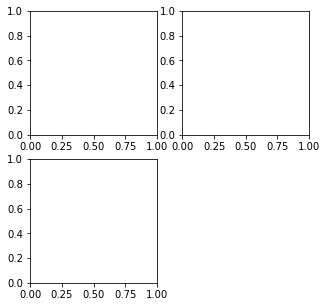

In [14]:
fig

In [15]:
ax1, ax2, ax3

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

Após a criação de uma figura e seus eixos, o último elemento a ser criado fica ativo. Comandos posteriores para a plotagem de gráficos serão executados nesse elemento.

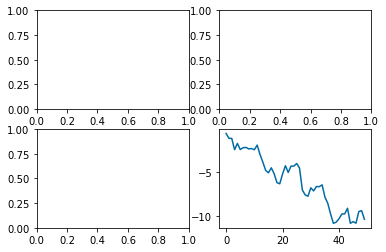

In [16]:
fig, axs = plt.subplots(2, 2)
plt.plot(np.random.randn(50).cumsum()); # Note o uso do ponto-e-vírgula. 
                                        # Ele impede que o Jupyter mostre certos outputs.

<font color = "red"><strong><u>Atenção</u>:</strong></font> Em notebooks do Jupyter, a configuração de gráficos é *resetada* após cada célula ser avaliada. Assim, para gerar gráficos mais complexos, é necessário incluir todos os comandos em uma única célula.

## Gráficos e seus elementos

As partes de um gráfico no `matplotlib` são elencadas na seguinte figura, retirada de um [tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#) oficial do pacote:

<figure>
  <img src="https://matplotlib.org/stable/_images/anatomy.png" alt="Parts of a chart" style="width:70%">
</figure>


Há métodos para tratar cada elemento de um gráfico, como títulos, rótulos e eixos, e argumentos de métodos de plotagem que definem as características do que é plotado. Por exemplo, o tutorial do `matplotlib` mostra como podemos configurar as cores, tamanhos, e rótulos dos eixos de um diagrama de dispersão. 

In [17]:
# Geração de dados aleatórios
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.abs(np.random.randn(50)*100)}
data['b'] = 1.5*np.sqrt(data['a']) + np.random.randn(50)

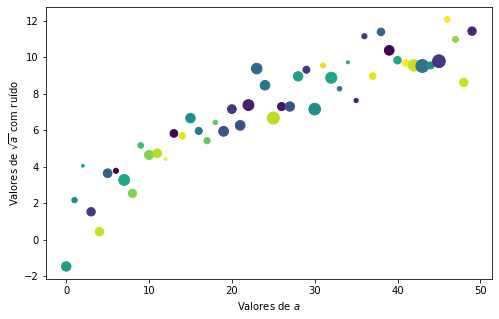

In [18]:
# Plotagem da figura
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter('a', 'b',   # variáveis a serem plotadas
            c='c',     # definição das cores dos marcadores
            s='d',     # defnição do tamanho dos marcadores
            data=data  # fonte dos dados
          )
ax.set_xlabel('Valores de $a$')                    # Rótulo do eixo X
ax.set_ylabel('Valores de $\sqrt{a}$ com ruído');  # Rótulo do eixo Y

### Linhas e marcadores

Podemos criar vários gráficos de linhas superpostos em um mesmo eixo e figura. Cada linha pode ser configurada separadamente, variando suas cores, espessuras, tipos, etc. Para mais detalhes, veja a página [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [19]:
# Geração de dados:
x = [i for i in range(50)]
y1 = 10*np.random.randn(50).cumsum()
y2 = 10*np.random.randn(50).cumsum()

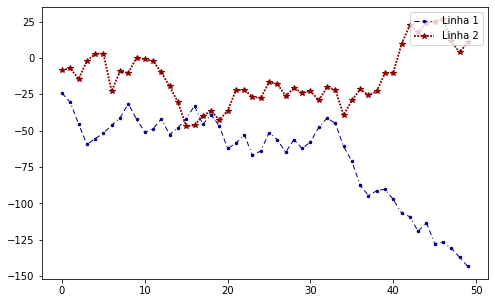

In [20]:
fig = plt.figure(figsize = (8, 5))
ax1 = fig.add_subplot()
ax1.plot(x, y1,
         linewidth = 1,
         color = "navy",
         linestyle = (0, (5, 3, 5, 3, 1, 3)),
         marker = ".",
         markersize = 5,
         label = "Linha 1")
ax1.plot(x, y2,
         linestyle = (0, (1, .75)),
         linewidth = 1.85,
         color = "darkred",
         marker = "*",
         markersize = 5.5,
         label = "Linha 2")
ax1.legend(loc = "upper right");

### Eixos e grade

Várias características dos eixos podem ser configuradas, incluindo o intervalo coberto, e as marcações. Para mais detalhes, consulte:

 - [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html)
 - [matplotlib.axes.Axes.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)

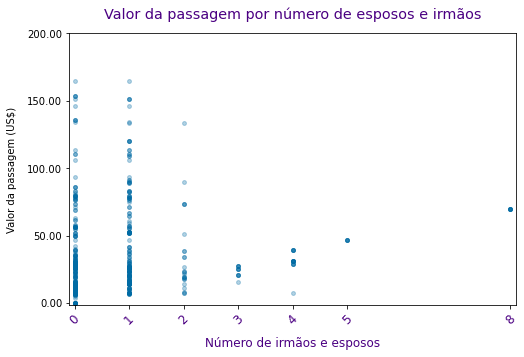

In [21]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot()
ax.scatter(x = "SibSp", y = "Fare",
           s = 15,
           alpha = .3,
           data = dados);
ax.set_title("Valor da passagem por número de esposos e irmãos",
             color = "indigo",
             fontsize = "x-large",
             pad = 15)

# Títulos:
ax.set_xlabel("Número de irmãos e esposos",
              color = "indigo",
              fontsize = "large")
ax.xaxis.labelpad = 10
ax.set_ylabel("Valor da passagem (US$)")
ax.yaxis.labelpad = 10

# Limites:
ax.set_xlim([-0.1, 8.1])
ax.set_ylim([-1.5, 200])

# Marcações:
ax.set_xticks(dados["SibSp"].unique())
ax.set_yticks(np.linspace(0, 200, 5))
ax.set_yticklabels([f"{i:.2f}" for i in np.linspace(0.0, 200.0, 5, dtype = "float")])

# Outros parâmetros:
ax.tick_params(axis = "x",
               which = "major",
               labelsize = "large",
               labelcolor = "indigo",
               labelrotation = 45)

Da mesma forma, é possível alterar as propriedades da grade do gráfico.

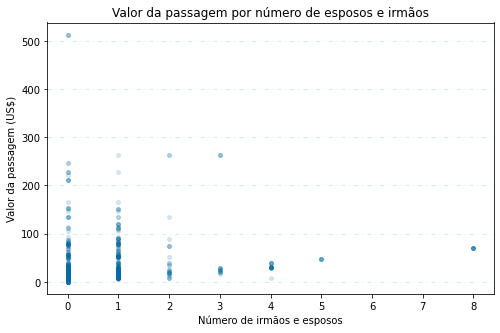

In [22]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot()
ax.scatter(x = "SibSp", y = "Fare",
           s = 15,
           alpha = .15,
           data = dados);
ax.set_title("Valor da passagem por número de esposos e irmãos")
ax.set_xlabel("Número de irmãos e esposos")
ax.set_ylabel("Valor da passagem (US$)")

ax.grid(visible = True,
        axis = "y",
        alpha = .5,
        color = "skyblue",
        linestyle = (0, (5, 5, 1, 5)))

### Rótulos, anotações e legendas

É possível adicionar elementos textuais a gráficos do `matplotlib`. Esses elementos são de três tipos:

 - *rótulos*: identificam elementos do gráfico (ex., eixos) ou grupos de dados
 - *anotações*: informação adicional adicionada ao gráfico como texto
 - *legendas*: identificam grupos de dados no gráfico (linhas, marcadores, etc.)

No exemplo seguinte, gera-se um histograma da idade dos passageiros do Titanic. São customizados os rótulos dos eixos, e é adicionada uma anotação formatada com o [LaTeX](https://www.latex-project.org/). 

In [23]:
mu = round(dados['Age'].mean(), 2)
sigma = round(dados['Age'].std(), 2)
texto = f'$\mu={mu},\ \sigma={sigma}$'

mu, sigma, texto

(29.7, 14.53, '$\\mu=29.7,\\ \\sigma=14.53$')

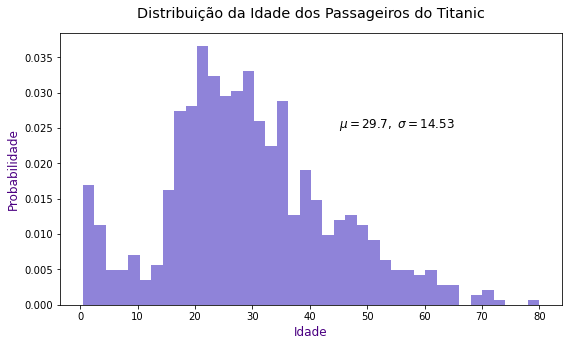

In [24]:
fig, ax = plt.subplots(figsize=(9, 5))

_ = ax.hist(dados['Age'], 
            bins = 40, 
            density=True, 
            facecolor='slateblue', 
            alpha=0.75)
ax.set_title('Distribuição da Idade dos Passageiros do Titanic',
             size = "x-large",
             pad = 15)
ax.set_xlabel('Idade', 
              color = "indigo", 
              size = "large")
ax.set_ylabel('Probabilidade', 
              color = "indigo", 
              size = "large")
ax.text(45, .025, texto, 
        fontsize = "large", 
        color = "black");

No diagrama de dispersão a seguir, já mostrado anteriormente, adicionamos uma anotação. A página [Annotations](https://matplotlib.org/stable/tutorials/text/annotations.html) descreve as várias possibilidades de formatação de anotações no `matplotlib`.

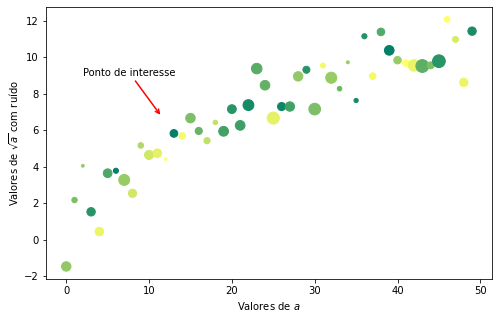

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter('a', 'b',    # variáveis a serem plotadas
            c='c',      # definição das cores dos marcadores
            s='d',      # defnição do tamanho dos marcadores
            data=data,  # fonte dos dados
            cmap="summer" 
          )
ax.set_xlabel('Valores de $a$')                    # Rótulo do eixo X
ax.set_ylabel('Valores de $\sqrt{a}$ com ruído');  # Rótulo do eixo Y

ax.annotate("Ponto de interesse", 
            xy = (11.5, 6.75), 
            xytext = (2, 9),
            arrowprops = {"arrowstyle": "->",
                          "color": "red",
                          "linewidth": 1.5});


No gráfico acima, usamos o parâmetro *cmap* para mudar a paleta de cores padrão do `matplotlib`. A página [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) provê mais informações sobre como selecionar e alterar as cores em um gráfico.

Legendas adicionam informações a um gráfico para identificar elementos gráficos associados a variáveis, como as cores e tamanhos dos marcadores no diagrama de dispersão acima. 

Mais detalhes sobre a configuração de legendas podem ser obtidas nas seguintes páginas:

 - [matplotlib.pyplot.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
 - [How to Add Legend to Scatterplot Colored by a Variable with Matplotlib in Python](https://datavizpyr.com/add-legend-to-scatterplot-colored-by-a-variable-with-matplotlib-in-python/)

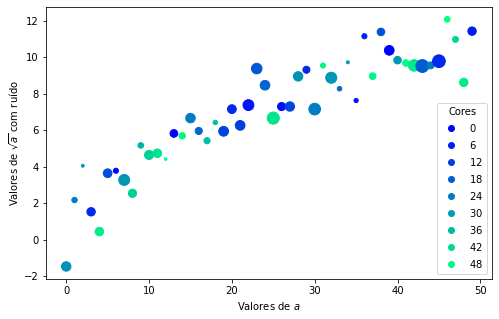

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))
diagrama = ax.scatter('a', 'b',         # variáveis a serem plotadas
                       c='c',           # definição das cores dos marcadores
                       s='d',           # defnição do tamanho dos marcadores
                       data=data,       # fonte dos dados
                       cmap = "winter"  # paleta de cores
                     )
ax.set_xlabel('Valores de $a$')                    # Rótulo do eixo X
ax.set_ylabel('Valores de $\sqrt{a}$ com ruído');  # Rótulo do eixo Y

ax.legend(*diagrama.legend_elements(),
          title = "Cores",
          loc = 4);

Podemos usar a função *legend_elements* para gerar legendas para elementos gráficos associados a variáveis. A documentação da função está na página (https://matplotlib.org/stable/api/collections_api.html). Abaixo, ela é usada para criar legendas para tamanhos e cores.

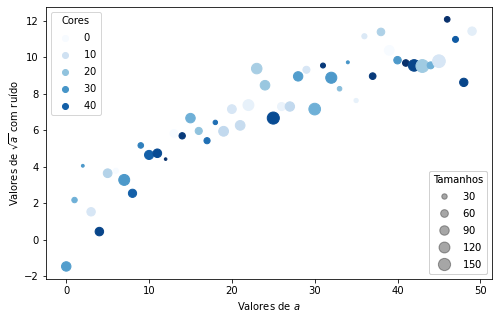

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
diagrama = ax.scatter('a', 'b',     # variáveis a serem plotadas
                       c='c',       # definição das cores dos marcadores
                       s='d',       # defnição do tamanho dos marcadores
                       data=data,   # fonte dos dados
                       cmap="Blues" # paleta de cores
                     )
ax.set_xlabel('Valores de $a$')                    # Rótulo do eixo X
ax.set_ylabel('Valores de $\sqrt{a}$ com ruído');  # Rótulo do eixo Y

# Legenda de cores:
legenda1 = ax.legend(*diagrama.legend_elements(num = 5),
                     loc="upper left",
                     title="Cores")
ax.add_artist(legenda1)

# Legenda de tamanhos:
handles, labels = diagrama.legend_elements(prop="sizes",
                                           num = 5,
                                           alpha = .3)
legenda2 = ax.legend(handles, labels, 
                     loc="lower right", 
                     title="Tamanhos")
ax.add_artist(legenda2);

Note que o método `legend_elements` retorna um par de listas com elementos gráficos e rótulos que podem ser usados para criar legendas. Saiba mais na seção [Automated legend creation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html) da documentação do `matplotlib`.

## Exemplos de tipos de gráficos

A base de dados do Titanic inclui poucas colunas númericas, e várias categóricas. Podemos recorrer ao website [From Data to Viz](https://www.data-to-viz.com/) para obter recomendações de tipos de gráficos e exemplos usando o `matplotlib`.

Abaixo, plotamos o número de esposos e irmãos contra a idade dos passageiros do Titanic, usando a cor para identificar se o passageiro sobreviveu ou não. Claramente, o tipo de gráfico escolhido não é o melhor para representar as informações desejadas.

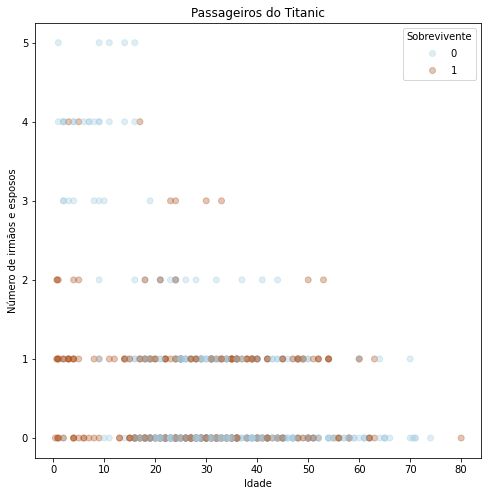

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
diagrama = ax.scatter(data = dados.dropna(axis = "rows",
                                          subset = ['Age', 'SibSp', 'Survived']),
                      x = 'Age', y = 'SibSp', 
                      c='Survived',
                      alpha = .35,
                      cmap = "Paired"
                     )
ax.set_title('Passageiros do Titanic')
ax.set_xlabel('Idade')
ax.set_ylabel('Número de irmãos e esposos')
ax.legend(*diagrama.legend_elements(), 
          loc="upper right", 
          title="Sobrevivente");

A seguir, tentamos usar um diagrama de dispersão para avaliar a distribuição de irmãos e esposos, e pais e filhos, considerando o sexo do passageiro. Novamente, o tipo de gráfico não foi uma boa escolha para representar as informações. Neste caso, a sobreposição de casos prejudica ainda mais a visualização.

In [29]:
dados_male = dados.loc[dados['Sex'] == 'male', ['SibSp', 'Parch']].dropna()
dados_female = dados.loc[dados['Sex'] == 'female', ['SibSp', 'Parch']].dropna()

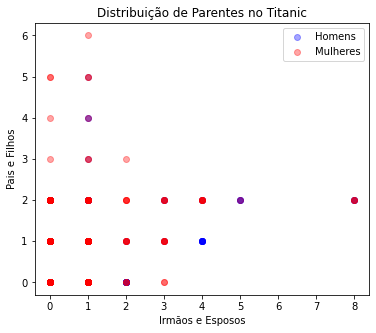

In [30]:
fig, ax = plt.subplots(figsize = (6, 5))
ax.scatter(dados_male["SibSp"], dados_male['Parch'],
           c = "blue",
           alpha = .35,
           label = "Homens"
          )
ax.scatter(dados_female["SibSp"], dados_female['Parch'],
           c = "red",
           alpha = .35,
           label = "Mulheres"
          )
ax.set_title('Distribuição de Parentes no Titanic')
ax.set_xlabel('Irmãos e Esposos')
ax.set_ylabel('Pais e Filhos')
ax.legend();

Diagramas de barras são uma boa opção para comparar estatísticas calculadas para categorias.

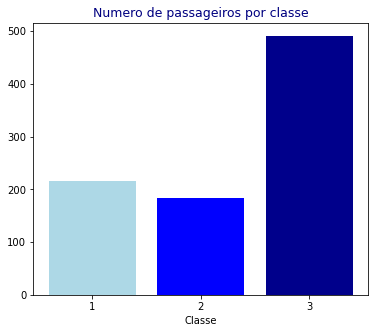

In [31]:
fig, ax = plt.subplots(figsize = (6, 5))
ax.bar(x = dados['Pclass'].unique(),
       height = dados['Pclass'].value_counts(),
       color = ["darkblue", "lightblue", "blue"]
      )
ax.set_xticks(dados['Pclass'].unique())
ax.set_title('Numero de passageiros por classe',
             fontdict = {'fontsize': 12.5,
                         'color': 'navy'})
ax.set_xlabel('Classe');

Diagramas de caixa permitem comparar a distribuição de variáveis numéricas para diferentes categorias.

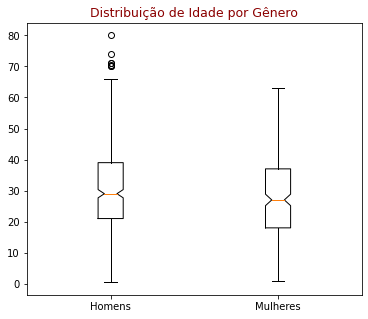

In [32]:
fig, ax = plt.subplots(figsize = (6, 5))
valores = (dados.loc[dados['Sex'] == 'male', 'Age'].dropna(), 
           dados.loc[dados['Sex'] == 'female', 'Age'].dropna())
ax.boxplot(x = valores,
           notch = True
          )
ax.set_title('Distribuição de Idade por Gênero',
             fontdict = {'fontsize': 12.5,
                         'color': 'darkred'})
ax.set_xticklabels(['Homens', 'Mulheres']);

Diagramas do tipo "pizza".

In [33]:
df = dados.loc[: , ["Survived", "Embarked"]].groupby("Embarked").count()

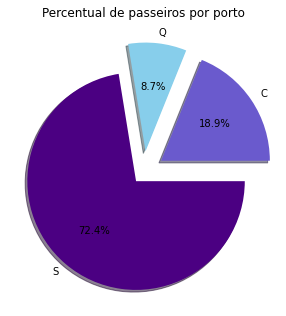

In [34]:
fig = plt.figure(figsize = (5, 5))
ax = fig.subplots()
ax.pie(df["Survived"],
       explode = [0.2, 0.2, 0.1],
       labels = df.index,
       colors = ["slateblue", "skyblue", "indigo"],
       autopct = '%1.1f%%',
       shadow = True)
ax.set_title("Percentual de passeiros por porto",
             pad = 20);

## Arranjos de múltiplos gráficos

É possível criar grades complexas, com diferentes formatos de eixos.

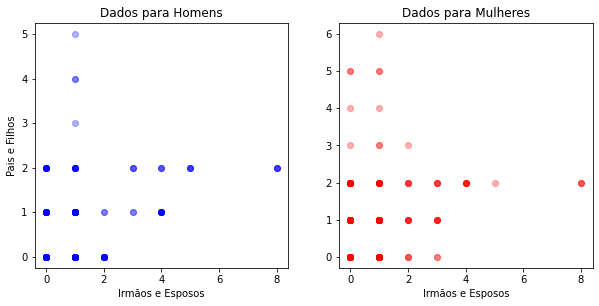

In [35]:
fig, axd = plt.subplot_mosaic([['left', 'right']],
                             figsize = (10, 4.5))
axd['left'].set_title('Dados para Homens')
axd['right'].set_title('Dados para Mulheres')

axd['left'].scatter(dados_male["SibSp"], dados_male['Parch'],
                    c = "blue",
                    alpha = .3)
axd['left'].set_xlabel('Irmãos e Esposos')
axd['left'].set_ylabel('Pais e Filhos')
axd['right'].scatter(dados_female["SibSp"], dados_female['Parch'],
                     c = "red",
                     alpha = .3)
axd['right'].set_xlabel('Irmãos e Esposos');

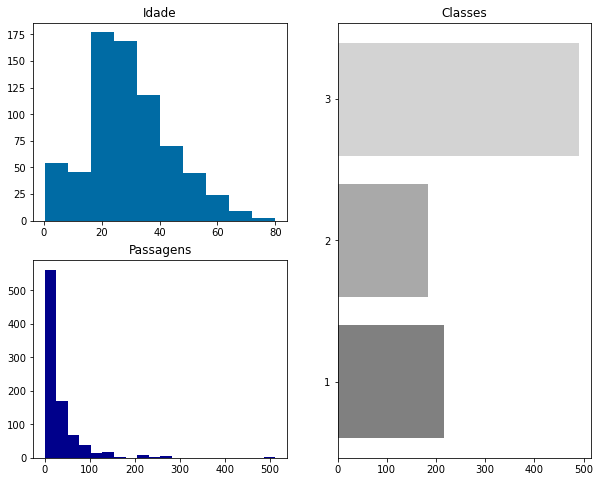

In [36]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']],
                             figsize = (10, 8))
axd['upleft'].set_title('Idade')
axd['lowleft'].set_title('Passagens')
axd['right'].set_title('Classes')
axd['upleft'].hist(dados['Age'])
axd['lowleft'].hist(dados['Fare'], 20,
                    facecolor = "darkblue")
axd['right'].barh(dados['Pclass'].unique(),
                  dados['Pclass'].value_counts(),
                  color = ["lightgray", "gray", "darkgray"])
axd['right'].set_yticks(dados['Pclass'].unique());

## Gravação de figuras

Figuras geradas com o pacote `matplotlib` podem ser gravadas em diferentes formatos. Veja a página [matplotlib.pyplot.savefig](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.savefig.html) para mais informações.

<Figure size 432x288 with 0 Axes>

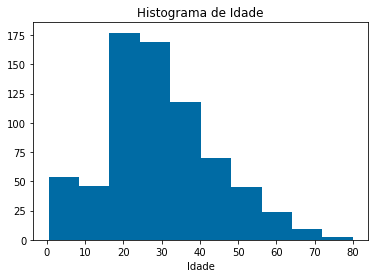

In [37]:
fig = plt.figure()
fig, ax = plt.subplots()
_ = ax.hist(dados["Age"])
ax.set_title("Histograma de Idade")
ax.set_xlabel("Idade")

# Gravação do arquivo:
plt.savefig('Histograma.png', 
            format = 'png', 
            dpi = 300);

# Seaborn

`seaborn` é um pacote que adiciona funcionalidades e simplifica a construção de gráficos no `matplotlib`. Quando o pacote é importado, várias configurações que são padrão no `matplotlib` são ajustadas para melhorar a visualização dos gráficos.

Os seguintes links são úteis para aprender mais sobre as funcionalidades do `seaborn`:

 - [User guide and tutorial](https://seaborn.pydata.org/tutorial.html)
 - [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
 - [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [38]:
import seaborn as sns
sns.set_theme()  # define a configuração visual para o padrão do seaborn

O pacote inclui diversas bases de dados para ilustrar as opções de geração de gráficos. 

In [39]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Vamos carregar e usar a base de dados *tips*, que contém dados sobre refeições num restaurante e as gorjetas dadas.

In [40]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


O `seaborn` é capaz de trabalhar diretamente com *DataFrames*, de forma mais simples e intuitiva do que o `matplotlib`.

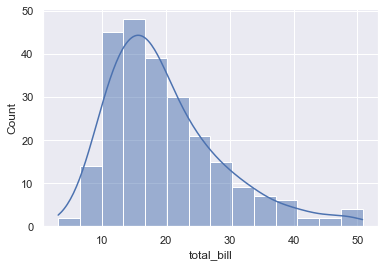

In [41]:
sns.histplot(data = tips, x = "total_bill", kde = True);

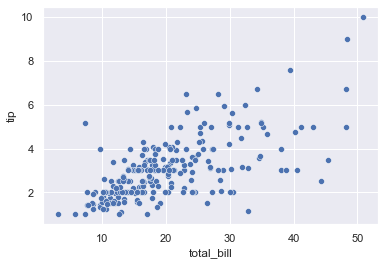

In [42]:
sns.scatterplot(data = tips, x = "total_bill", y = "tip");

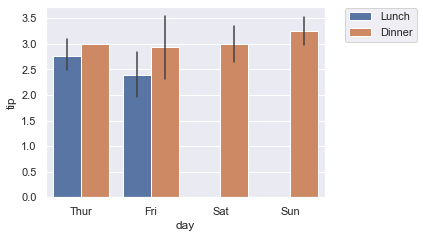

In [43]:
fig = plt.figure(figsize = (5, 3.5))
sns.barplot(data = tips, x = "day", y = "tip", hue = "time", 
            estimator = np.mean, 
            errwidth = 1.5
           )
plt.legend(bbox_to_anchor = (1.05, 1.025));

## Métodos *figure-level* e *axis-level*

O pacote é composto por vários módulos, com funcionalidades específicas para trabalhar com certos tipos de dados. No entanto, os métodos e funções de cada módulo podem ser acessados no nível do próprio pacote.

A figura abaixo mostra as funções de nível mais alto dos três principais módulos (*figure-level functions*), e as funções específicas de cada um deles (*axis-level functions*). As funções de nível mais alto implementam uma interface com o `matplotlib` por meio de um objeto gerado pelo `seaborn`.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" alt="Estrutura do seaborn" width = 400px>

Funções de nível mais alto (*figure-level*) podem ser usadas para gerar os gráficos associados às funções de nível mais baixo (*axis-level*). o argumento *kind* define o tipo de gráfico gerado.

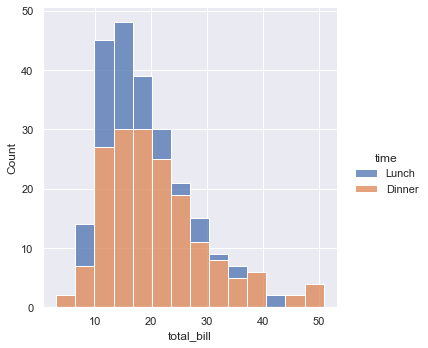

In [44]:
# Figure-level:
sns.displot(data = tips, 
            x = "total_bill", 
            hue = "time", 
            multiple = "stack",
            kind = "hist");

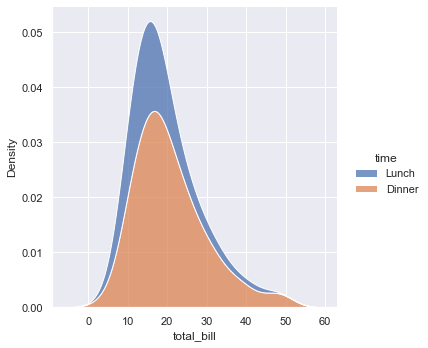

In [45]:
# Axis-level:
sns.displot(data = tips, 
            x = "total_bill", 
            hue = "time", 
            multiple = "stack", 
            kind = "kde");

As funções *axis-level* geram gráficos ligeiramente diferentes dos criados com as funções *figure-level*. Comparando o gráfico abaixo com o anterior, percebemos diferenças na moldura, legenda, e tamanho da figura.

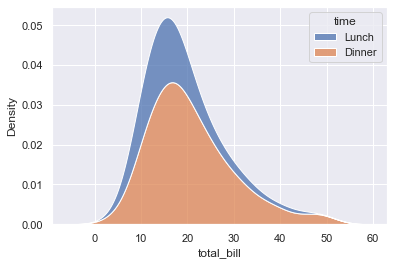

In [46]:
sns.kdeplot(data = tips, 
            x = "total_bill", 
            hue = "time",
            multiple = "stack");

Os métodos do tipo *figure-level* permitem, no entanto, que se crie *subplots* facilmente.

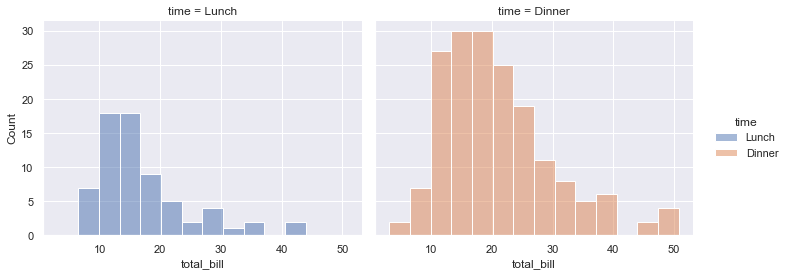

In [47]:
sns.displot(data = tips, 
            x = "total_bill", 
            hue = "time", 
            col = "time",
            kind = "hist",
            height = 4,
            aspect = 1.25);

Os métodos *figure-level* alteram uma figura do `maptlotlib` como um todo. Dessa forma, ajustes específicos devem ser feito via comandos do `matplotlib` ou `seaborn` aplicados a objetos da figura gerada pelos métodos. No exemplo abaixo, o método *distplot* gera um objeto do `seaborn` do tipo [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

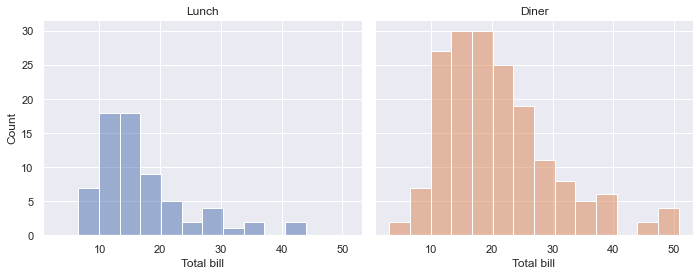

In [48]:
facet_grid = sns.displot(data = tips, 
                         x = "total_bill", 
                         hue = "time", 
                         col = "time",
                         kind = "hist",
                         height = 4,
                         aspect = 1.25)

facet_grid.legend.set_visible(False)
facet_grid.set_xlabels("Total bill")
facet_grid.axes[0][0].set_title("Lunch")
facet_grid.axes[0][1].set_title("Diner");

Já os métodos *axis-level* foram criados para substituir os métodos similares do `matplotlib`. Dessa forma, podem ser inseridos em sequências de comandos complexas do `matplotlib` sem problemas. Eles afetam apenas o eixo correspondente.

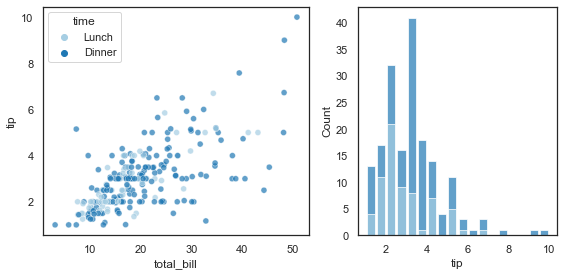

In [49]:
sns.set_theme(style = "white",
              palette = "Paired")

fig, axes = plt.subplots(1, 2, 
                         figsize = (8, 4), 
                         gridspec_kw = dict(width_ratios = [4, 3]))
sns.scatterplot(data = tips, 
                x = "total_bill", 
                y = "tip", 
                hue = "time", 
                alpha = .7,
                ax = axes[0])
sns.histplot(data = tips, 
             x = "tip", 
             hue = "time", 
             shrink = .8, 
             alpha = .7, 
             legend = False, 
             ax = axes[1])
fig.tight_layout()

sns.set()

De acordo com a [documentação](https://seaborn.pydata.org/tutorial/function_overview.html) do `seaborn`:

*Em suma, as **funções de nível de figura** adicionam alguma complexidade adicional que pode tornar as coisas mais confusas para iniciantes, mas seus recursos únicos lhes dão poder adicional [...] elas produzem gráficos um pouco mais limpos, e **geralmente recomendamos seu uso para a maioria dos casos**. A única situação em que elas não são uma boa escolha é quando você precisa fazer uma figura complexa composta por vários tipos de subplots diferentes. Nesse caso, é recomendado criar a figura usando o `matplotlib` diretamente e gerar os componentes individuais usando funções de nível de eixo.*

## Gráficos compostos

Os métodos de nível de figura *jointplot* e *pairplot* gerar gráficos compostos por elementos que representam diferentes aspectos dos dados envolvidos. 

Os componentes dos *grids* gerados podem ser configurados individualmente, de forma similar ao que fizemos no `matplotlib`.

Para mais detalhes, veja:

 - [JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html)
 - [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

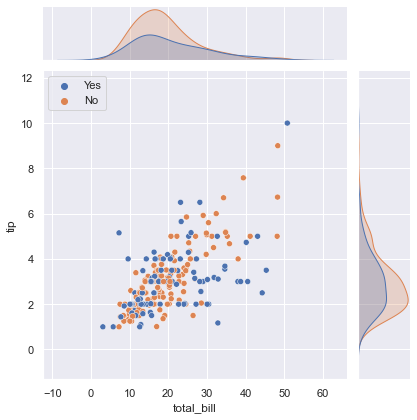

In [50]:
g = sns.jointplot(data = tips,
                  x = "total_bill",
                  y = "tip",
                  hue = "smoker")
g.ax_joint.legend(loc = "upper left");  # alteração da localização da legenda

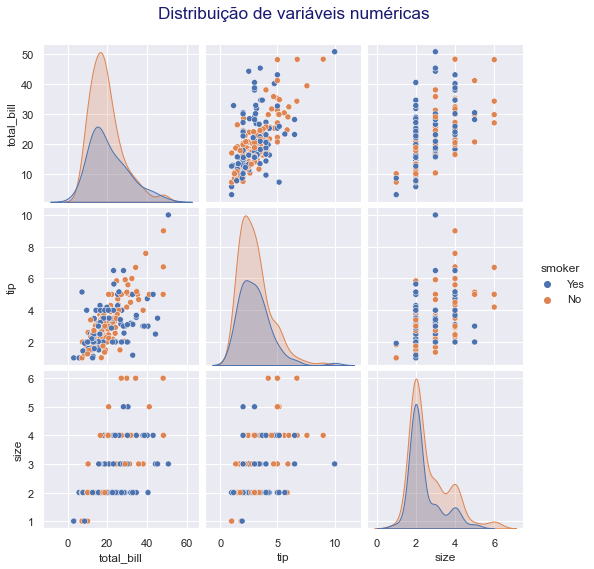

In [51]:
g = sns.pairplot(data = tips,
                 hue = "smoker")
g.figure.suptitle("Distribuição de variáveis numéricas",  # adição de um título
                  x = .5,
                  y = 1.05,
                  fontsize = "x-large",
                  fontdict = {"color": "midnightblue"});

As partes de um *PairGrid* (objeto gerado pelo método *pairgrid*) podem ser configuradas separadamente.

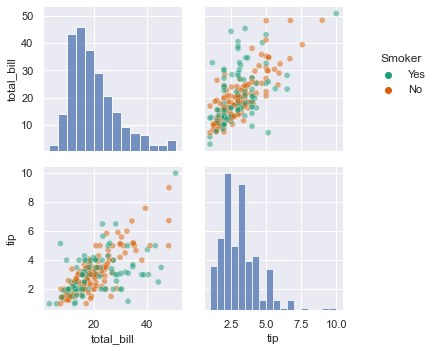

In [52]:
g = sns.PairGrid(data = tips,
                 hue = "smoker",
                 vars = ["total_bill", "tip"],
                 palette = "Dark2")
g.map_diag(sns.histplot, 
           hue = None)
g.map_offdiag(sns.scatterplot,
              alpha = .5)
g.add_legend(bbox_to_anchor=(1.075, .775),
             title = "Smoker");

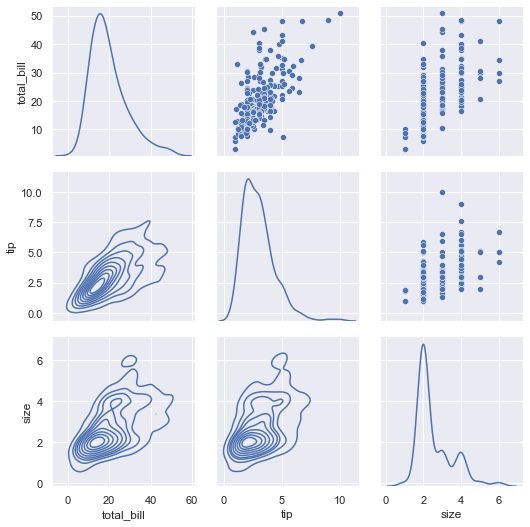

In [53]:
g = sns.PairGrid(data = tips, 
                 diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot);

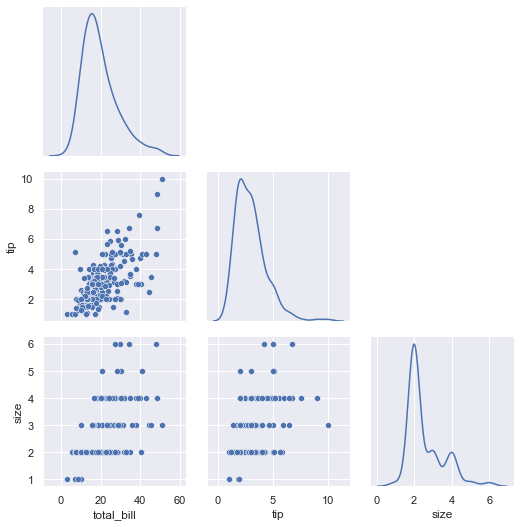

In [54]:
g = sns.PairGrid(data = tips, 
                 diag_sharey = False,
                 corner = True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot);

Para resetar a configuração dos elementos visuais para o padrão do `matplotlib`, usamos a função *reset_orig*.

In [55]:
sns.reset_orig()

# Pandas

`pandas` implementa vários métodos para a geração de gráficos básicos. O tutorial [Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) descreve a aplicação de vários desses métodos. Exemplos são mostrados a seguir.

In [56]:
data = pd.DataFrame(data)
data.head()

,a,c,d,b
0,0,28,88.994134,-1.469752
1,1,24,29.438928,2.168817
2,2,29,7.956104,4.046353
3,3,8,70.713561,1.525050
4,4,45,72.148784,0.440657


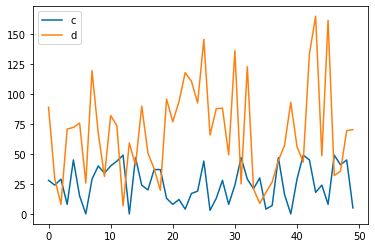

In [57]:
data[["c", "d"]].plot();

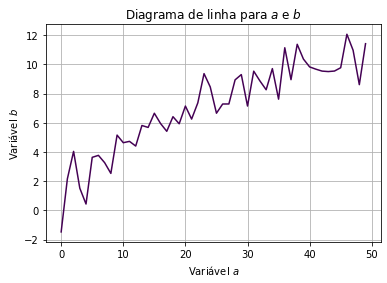

In [58]:
data.plot(x = "a", y = "b",
          grid = True,
          legend = False,
          colormap = "viridis",
          title = "Diagrama de linha para $a$ e $b$",
          xlabel = "Variável $a$",
          ylabel = "Variável $b$");

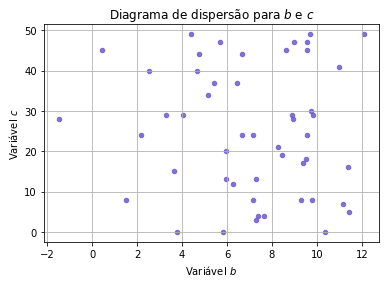

In [59]:
data.plot(x = "b", y = "c",
          kind = "scatter",
          color = "slateblue",
          alpha = .85,
          grid = True,
          legend = False,
          title = "Diagrama de dispersão para $b$ e $c$",
          xlabel = "Variável $b$",
          ylabel = "Variável $c$");

In [60]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


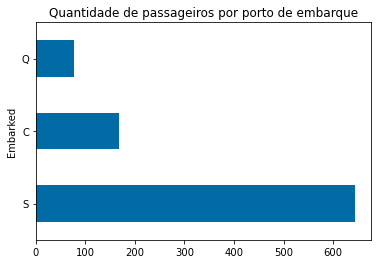

In [61]:
dados.value_counts("Embarked").plot(kind = "barh",
                                    title = "Quantidade de passageiros por porto de embarque");

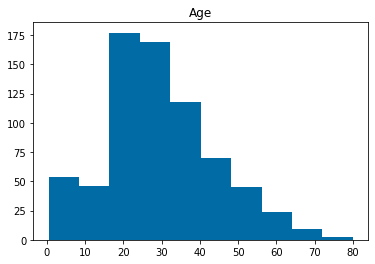

In [62]:
dados.hist(column = "Age",
           grid = False);

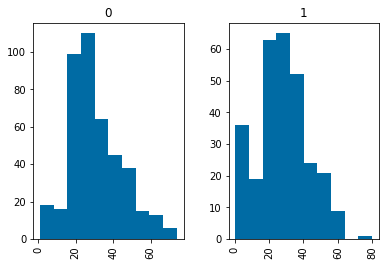

In [63]:
dados.hist(column = "Age", 
           by = "Survived");

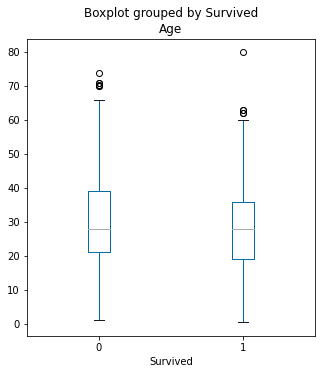

In [64]:
dados.boxplot(column = "Age", 
              by = "Survived", 
              grid = False, 
              figsize = (5, 5.5));

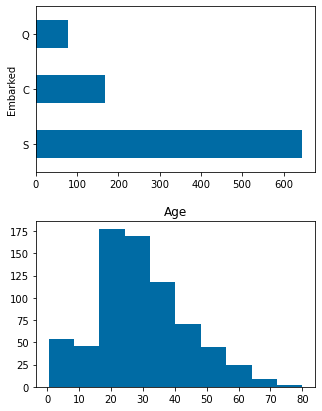

In [65]:
fig = plt.figure(figsize = (5, 7))
axes = fig.subplots(2, 1)
dados.value_counts("Embarked").plot.barh(ax = axes[0])
dados.hist(ax = axes[1], 
           column = "Age",
           grid = False
          );